# Chapter 3 - Scikit-Learn

In [1]:
from sklearn import datasets # sklearn is a module, datasets is a class inside sklearn
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:,[2,3]]
y = iris.target

In [4]:
[type(X),type(y),len(X),len(y)]

[numpy.ndarray, numpy.ndarray, 150, 150]

In [5]:
X[:10]

array([[ 1.4,  0.2],
       [ 1.4,  0.2],
       [ 1.3,  0.2],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.7,  0.4],
       [ 1.4,  0.3],
       [ 1.5,  0.2],
       [ 1.4,  0.2],
       [ 1.5,  0.1]])

In [6]:
np.unique(y) # 0: setosa, 1: versicolor, 2: virginica

array([0, 1, 2])

In [7]:
from sklearn.cross_validation import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0) 
# split data into 70% training set and 30% test set

## standardization of data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler() # class

In [11]:
sc.fit(X_train) 
# estimate mean and standard deviation for each feature from training data (will use same parameters for test set)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training a perceptron

In [13]:
from sklearn.linear_model import Perceptron

In [14]:
ppn = Perceptron(n_iter = 40, eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std,y_train) # training the perceptron, i.e. finding correct weights

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [15]:
y_predict = ppn.predict(X_test_std)

In [16]:
print("Number of misclassified samples is %d" % (y_predict != y_test).sum())

Number of misclassified samples is 4


In [17]:
from sklearn.metrics import accuracy_score

In [18]:
print("Accuracy is %.3f" % accuracy_score(y_predict,y_test))

Accuracy is 0.911


## Plot decision regions

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [20]:
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    # setup marker generator and colour map
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surface
    
    x1_min, x1_max  = X[:,0].min() -1 , X[:,0].max() + 1
    x2_min, x2_max  = X[:,1].min() -1 , X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim = (xx1.min(),xx1.max())
    plt.ylim = (xx2.min(),xx2.max())
    
    #plot all samples
    
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)): # thie enumerate gives the number (0,1,2) and label (name of flower)
        plt.scatter(x = X[y==cl,0],y = X[y == cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
        
    #highlight test samples
    
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')
    
    
    

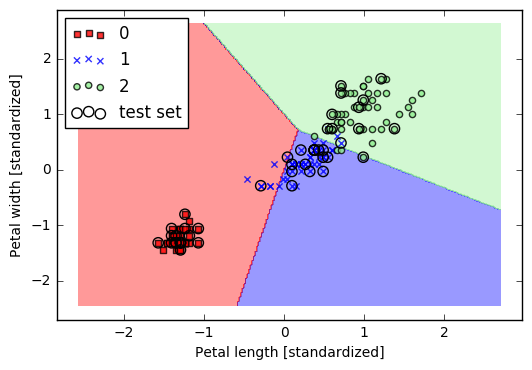

In [21]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,test_idx=range(105,150),classifier=ppn)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [22]:
a=enumerate(np.unique(y))

In [23]:
a

# Logistic Regression

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# inverse of logit function log(p/(1-p))
def sigmoid(z):   
    return 1.0/(1+np.exp(-z))

In [26]:
z = np.arange(-7,7,0.1) # np.arange is similar to range but returns an array - thus we can use all array operations ^^
phi_z = sigmoid(z)

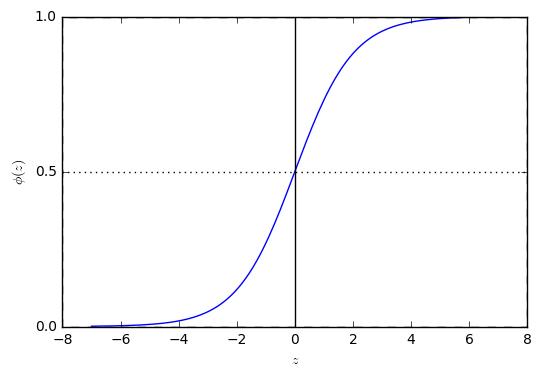

In [27]:
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhspan(0., 1., facecolor='1.0', alpha=1.0, ls='dashed') # doesn't do anything I don't know why
plt.yticks([0.0,0.5,1.0])
plt.axhline(y=0.5,ls='dotted',color='k')
# plt.ylim(-1,1) doesn't work Idk why either
plt.xlabel('$z$')
plt.ylabel('$\phi(z)$')

plt.show()

# Training a Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr = LogisticRegression(C=1000.0, random_state=0) # C = 1/lambda where lambda is the regularization scale - penalty for very large weights
lr.fit(X_train_std,y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

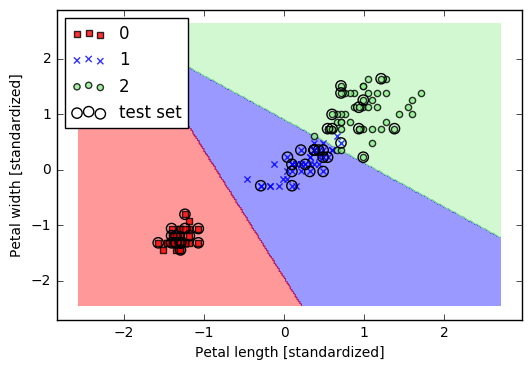

In [30]:
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=lr,test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.show()

In [31]:
a = lr.predict_proba(X_test_std[0:3,:]) # probability of each sample belonging to each class (cols 2 and 3)

In [32]:
np.round(a,3)

array([[ 0.   ,  0.063,  0.937],
       [ 0.001,  0.999,  0.   ],
       [ 0.817,  0.183,  0.   ]])

In [33]:
a.shape

(3, 3)

In [34]:
v = np.array([1,2,3])
v.shape

(3,)

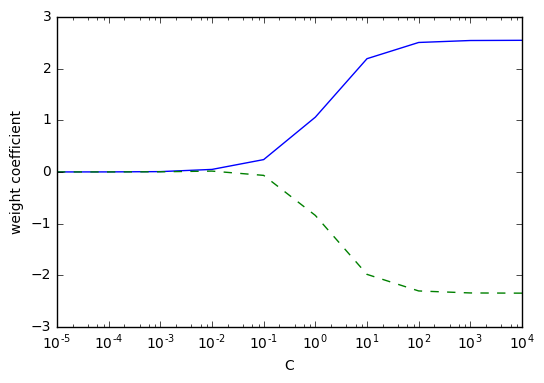

In [35]:
weights, params = [], []
for c in np.arange(-5,5): # This return an array as opposed to a list
    lr = LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1]) #Coefficient of the features in the decision function.
    params.append(10**c)
    
weights = np.array(weights)
plt.plot(params, weights[:,0], label = 'petal length')
plt.plot(params, weights[:,1], linestyle = '--', label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
#plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

    

In [36]:
type(np.arange(-5,5))

numpy.ndarray

In [37]:
a=range(-5,5)

In [38]:
a[0]

-5

In [39]:
type(a)

range

## Support Vector Machines and non-linearly separable cases
### Just testing with the previous data

In [40]:
from sklearn.svm import SVC

In [41]:
svm = SVC(kernel='linear',C=1.0,random_state=0)

In [42]:
svm.fit(X_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

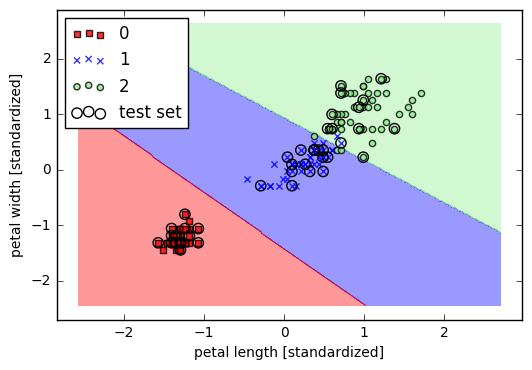

In [43]:
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Generating some non-linearly separable data

In [44]:
X_xor = np.random.randn(200,2) # 200x2 matrix with random values with normal distribution

In [45]:
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)

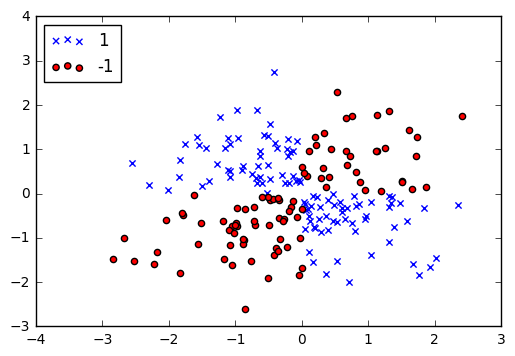

In [46]:
plt.scatter(X_xor[y_xor == 1,0],X_xor[y_xor == 1,1], c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1,0],X_xor[y_xor == -1,1], c = 'r', marker = 'o', label = '-1')
plt.legend(loc= 'upper left')
plt.show()

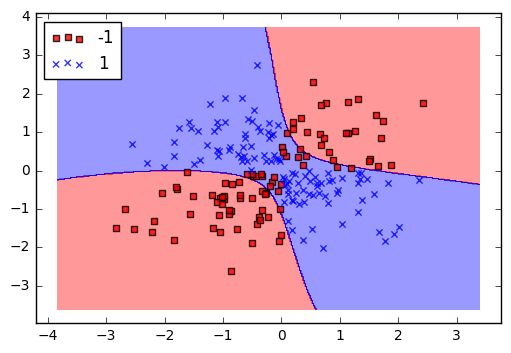

In [47]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10,C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

## KNN 

In [48]:
from sklearn.neighbors import KNeighborsClassifier

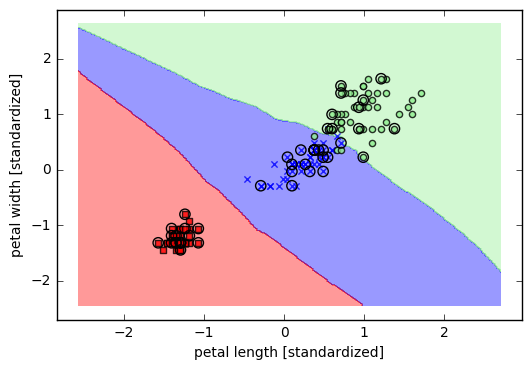

In [56]:
knn = KNeighborsClassifier(metric='minkowski',n_neighbors=10,p=2)
knn.fit(X_train_std,y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn,test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()
